# Importing libraies 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading dataset 

In [2]:
orignal_data = pd.read_csv('Data_MFR_310.csv')

# Creating copy of the dataset so that we doesn't make any changes in the orignal data 

In [3]:
data = orignal_data.copy()

## Checking and analysing the data 

In [4]:
data.head()

,Unnamed: 0,513FC31103.pv,513HC31114-5.mv,513PC31201.pv,513LC31202.pv,513FC31409.pv,513FC31114-5.pv,513TC31220.pv,MFR
0,04-05-2018 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-2018 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-2018 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-2018 01:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-2018 03:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


## Taking usefull insight out of the data 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2564 non-null   object 
 1   513FC31103.pv    2486 non-null   float64
 2   513HC31114-5.mv  2560 non-null   float64
 3   513PC31201.pv    2484 non-null   float64
 4   513LC31202.pv    2484 non-null   float64
 5   513FC31409.pv    2484 non-null   float64
 6   513FC31114-5.pv  2486 non-null   float64
 7   513TC31220.pv    2484 non-null   float64
 8   MFR              2564 non-null   float64
dtypes: float64(8), object(1)
memory usage: 180.4+ KB


### Here we can see that there are so many rows where data is missing and few rows which are of no use to us like time as it is having no impact on the result of the data 

In [6]:
data =  data.drop(['Unnamed: 0'],axis=1)

## Renaming all the columns so that it would be easy for us identify the columns  

In [7]:
data['513FC31103.pv'] = data.rename(columns={'513FC31103.pv':'Propylene_flow'}, inplace=True)

In [8]:
data['513HC31114-5.mv'] = data.rename(columns={'513HC31114-5.mv':'Hydrogen_ratio'}, inplace=True)

In [9]:
data['513PC31201.pv'] = data.rename(columns={'513PC31201.pv':'Pressure_controller'}, inplace=True)

In [10]:
data['513LC31202.pv'] = data.rename(columns={'513LC31202.pv':'Level_controller'}, inplace=True)

In [11]:
data['513FC31409.pv'] = data.rename(columns={'513FC31409.pv':'Liquefied_Recycle_gas_to_R-310_dome_top'}, inplace=True)

In [12]:
data['513FC31114-5.pv'] = data.rename(columns={'513FC31114-5.pv':'Hydrogen_Flow'}, inplace=True)

In [13]:
data['513TC31220.pv'] = data.rename(columns={'513TC31220.pv':'Temperature_controller'}, inplace=True)

In [14]:
data.head()

,Propylene_flow,Hydrogen_ratio,Pressure_controller,Level_controller,Liquefied_Recycle_gas_to_R-310_dome_top,Hydrogen_Flow,Temperature_controller,MFR,513FC31103.pv,513HC31114-5.mv,513PC31201.pv,513LC31202.pv,513FC31409.pv,513FC31114-5.pv,513TC31220.pv
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4,None,None,None,None,None,None,None
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2,None,None,None,None,None,None,None
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2,None,None,None,None,None,None,None
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1,None,None,None,None,None,None,None
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3,None,None,None,None,None,None,None


## Droping the not required columns 

In [15]:
data = data.drop(['513FC31103.pv','513HC31114-5.mv','513PC31201.pv','513LC31202.pv','513FC31409.pv','513FC31114-5.pv','513TC31220.pv'],axis=1)

## Now the data is ready for pre processing 

In [16]:
data.head()

,Propylene_flow,Hydrogen_ratio,Pressure_controller,Level_controller,Liquefied_Recycle_gas_to_R-310_dome_top,Hydrogen_Flow,Temperature_controller,MFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


# Data preprocessing 

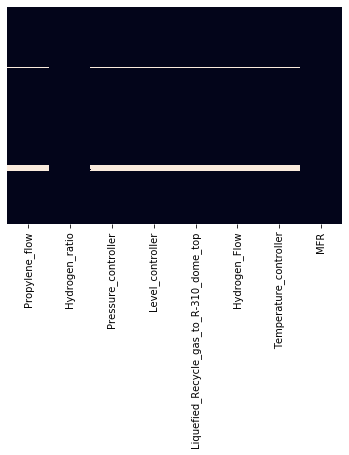

In [17]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

## As we can see that there are few rows which are having only 2 columns filled so we remove those rows as they as very less impact on the outcome of the result of the dataset

# Droping all the null values

In [18]:
data = data.dropna()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2484 entries, 0 to 2559
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Propylene_flow                           2484 non-null   float64
 1   Hydrogen_ratio                           2484 non-null   float64
 2   Pressure_controller                      2484 non-null   float64
 3   Level_controller                         2484 non-null   float64
 4   Liquefied_Recycle_gas_to_R-310_dome_top  2484 non-null   float64
 5   Hydrogen_Flow                            2484 non-null   float64
 6   Temperature_controller                   2484 non-null   float64
 7   MFR                                      2484 non-null   float64
dtypes: float64(8)
memory usage: 174.7 KB


# Checking the graph's 

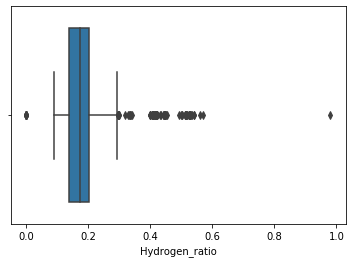

In [20]:
sns.boxplot(x='Hydrogen_ratio',data=data)

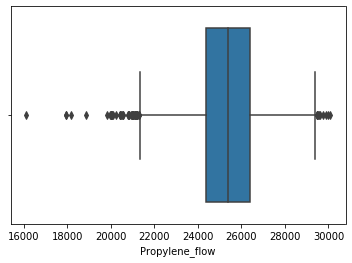

In [21]:
sns.boxplot(x='Propylene_flow',data=data)

## As you can see that there so many outliers in the graph so we need to remove them as they are having bad impact on the outcome of the data 

# Removing outliers

In [22]:
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

[[0.26273019 0.42590012 0.58798513 ... 0.60828028 0.30998733 0.9135353 ]
 [0.13629161 0.42590012 0.32269669 ... 0.20972067 1.55824061 0.95294074]
 [0.22540683 0.42590012 0.72656423 ... 0.27416357 1.61072253 0.95294074]
 ...
 [3.0802972  0.91869869 0.94038491 ... 1.05617656 0.7528853  0.66268252]
 [2.52148343 0.01767887 6.61289565 ... 0.02413806 4.32570514 1.07643969]
 [0.50812063 0.01767887 0.85579153 ... 0.82518188 1.99056261 0.84000702]]


In [23]:
threshold = 3
print(np.where(z > 3))

(array([  17,   21,   41,   44,  212,  227,  235,  308,  310,  311,  367,
        368,  369,  369,  370,  371,  371,  372,  373,  374,  375,  376,
        377,  378,  379,  380,  381,  382,  383,  384,  385,  386,  387,
        388,  389,  390,  391,  392,  414,  415,  415,  417,  418,  419,
        420,  421,  422,  423,  424,  425,  426,  427,  428,  429,  430,
        431,  432,  433,  434,  435,  436,  463,  464,  487,  625,  654,
        721,  730,  742,  743,  751,  752,  753,  755,  757,  787,  962,
        997, 1011, 1014, 1017, 1018, 1018, 1023, 1023, 1024, 1026, 1026,
       1028, 1029, 1039, 1040, 1040, 1040, 1041, 1042, 1046, 1047, 1052,
       1052, 1053, 1054, 1055, 1058, 1066, 1067, 1068, 1069, 1080, 1081,
       1082, 1083, 1091, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1101,
       1130, 1153, 1156, 1170, 1177, 1178, 1179, 1180, 1181, 1181, 1182,
       1183, 1183, 1184, 1233, 1237, 1240, 1241, 1242, 1245, 1292, 1293,
       1293, 1294, 1294, 1295, 1296, 1297, 1297, 1

In [24]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Propylene_flow                              2035.949750
Hydrogen_ratio                                 0.062000
Pressure_controller                            0.479609
Level_controller                               1.218716
Liquefied_Recycle_gas_to_R-310_dome_top    15214.760000
Hydrogen_Flow                                  0.043272
Temperature_controller                         0.818838
MFR                                            9.100000
dtype: float64


In [25]:
data = data[(z < 3).all(axis=1)]

In [26]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

Propylene_flow                              2054.838000
Hydrogen_ratio                                 0.058000
Pressure_controller                            0.460746
Level_controller                               1.213616
Liquefied_Recycle_gas_to_R-310_dome_top    14675.574000
Hydrogen_Flow                                  0.042881
Temperature_controller                         0.793076
MFR                                            8.900000
dtype: float64


## Now outliers have been moved so the data is all set for next process

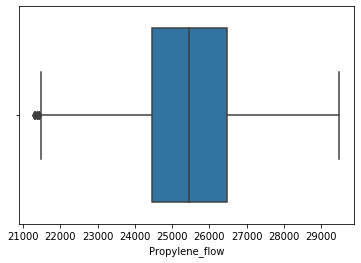

In [27]:
sns.boxplot(x='Propylene_flow',data=data)

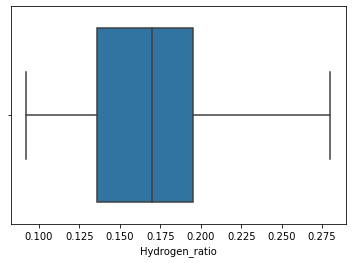

In [28]:
sns.boxplot(x='Hydrogen_ratio',data=data)

## We plotted corealtion matrices so that we can find out realtion between columns 

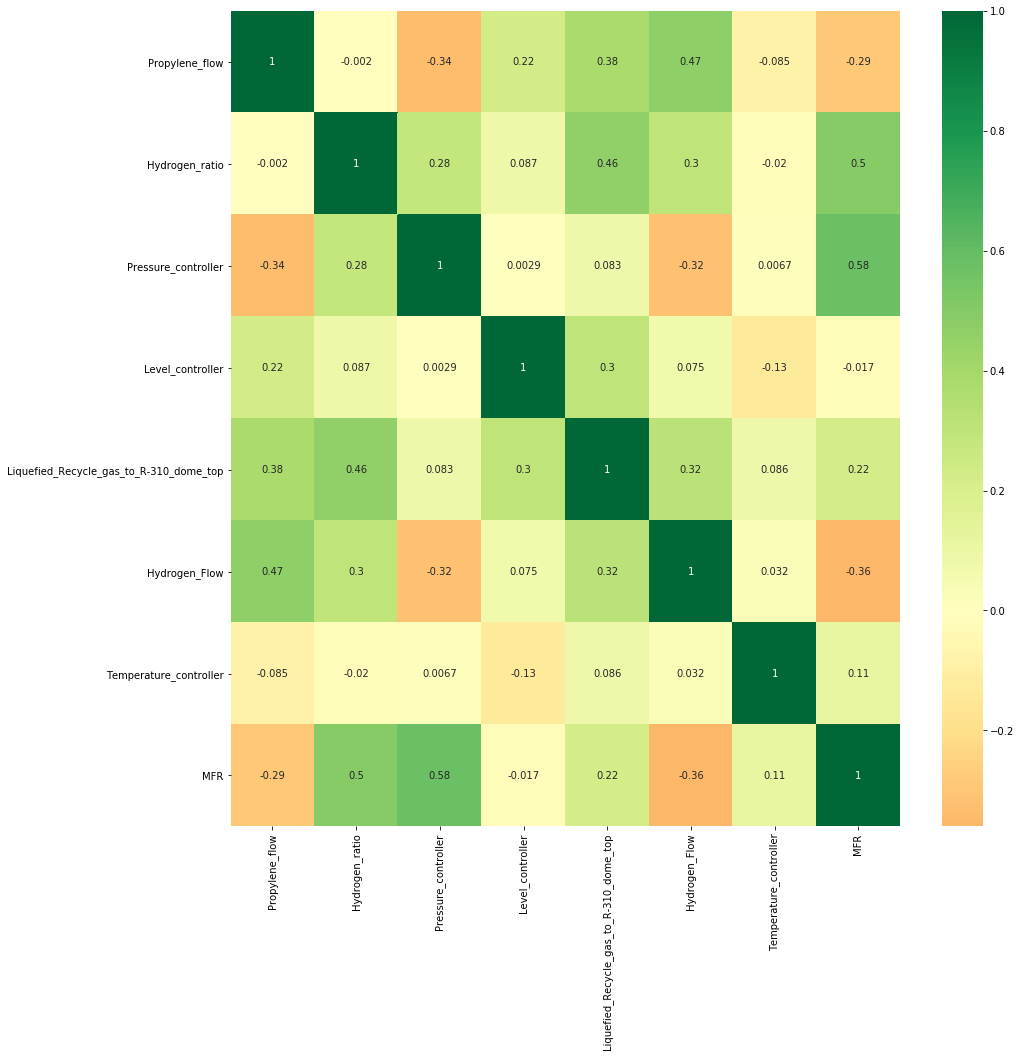

In [29]:
plt.figure(figsize=(15,15))
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',center=0)

## As level controller is having less impact on the dependent variable so if we remove the that row there would be very less imapcat on the outcome of the data 

In [30]:
data =  data.drop(['Level_controller'],axis=1)

In [31]:
data.head()

,Propylene_flow,Hydrogen_ratio,Pressure_controller,Liquefied_Recycle_gas_to_R-310_dome_top,Hydrogen_Flow,Temperature_controller,MFR
0,24856.584,0.153,30.414835,50850.578,0.163994,80.399605,3.4
1,25537.250,0.153,30.527121,42229.813,0.129739,78.861328,3.2
2,25689.266,0.153,30.356180,45335.852,0.150003,78.818115,3.2
3,25098.754,0.153,30.894308,43077.016,0.151543,79.022720,3.1
4,24853.941,0.150,30.680647,40404.387,0.122582,79.038483,3.3


## Spliting data into X and y 

In [32]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [33]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [34]:
X.shape

(2088, 6)

In [35]:
y.shape

(2088, 1)

## Doing Standard Scaling so that all the data is in one scale  

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
my_scaler = StandardScaler()

In [38]:
x_scaled = my_scaler.fit_transform(X)

In [39]:
x_scaled

array([[-0.37071736, -0.42878737, -0.77333654,  0.82216924,  0.99857368,
         0.58088429],
       [ 0.06971337, -0.42878737, -0.41623793,  0.00413901, -0.21591624,
        -2.02012341],
       [ 0.16807662, -0.42878737, -0.95987466,  0.29887316,  0.502509  ,
        -2.09319045],
       ...,
       [ 0.44837783,  0.20530033,  0.66500578, -1.88006875, -1.13719168,
         1.26726604],
       [ 0.58885877,  0.20530033,  0.39352929, -0.21889195, -0.56842074,
        -1.07885837],
       [-2.58334559,  0.20530033,  2.0624118 , -2.71185377, -1.91026966,
        -1.07270534]])

## Spliting data into train and testing set

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y,train_size=0.8,random_state=66)

# Using random forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor

## Traing the dataset 

In [59]:
regressor = RandomForestRegressor(criterion='mse',max_depth=5, n_estimators=110,random_state=11)
regressor.fit(X_train, y_train)

C:\Users\Nishant Kalanta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=110, n_jobs=None, oob_score=False,
                      random_state=11, verbose=0, warm_start=False)

In [60]:
y_pred = regressor.predict(X_test)

## Checking the accuracy 

In [61]:
from sklearn.metrics import r2_score

In [62]:
r2 = r2_score(y_test,y_pred)

In [63]:
print('Accuracy for Randrom forest = ',round(r2*100))

Accuracy for Randrom forest =  76.0


# Using multilinear regression 

In [64]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
y_pred = regressor.predict(X_test)

In [66]:
r2 = r2_score(y_test,y_pred)

In [67]:
print('Accuracy for Multilinear regression = ',round(r2*100))

Accuracy for Multilinear regression =  64.0


# After using Random forest and Multilinear regression we get the best accuracy of 76% in random forest